In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

# BASE_DIR = "./drive/MyDrive/ml-project/dl-sprint"

In [2]:
import cv2
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
image = cv2.imread("./cv-dev-balanced/other_dev_sample-000004.png")
print(image.shape)

(374, 500, 3)


In [4]:
#@title Model Creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=image.shape))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding="valid", activation="relu"))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.build()
model.summary()

adam = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adam)

print("Model built and optimizer added")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 370, 496, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 185, 248, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 181, 244, 48)      38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 122, 48)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 527040)            0         
                                                                 
 dense (Dense)               (None, 256)               1

In [5]:
df = pd.read_csv("./cv-dev-balanced.csv")

X = df["imgname"]
y = df["label"]

X_imgname = X.values
X_img = []
lim = len(X)

for i in tqdm(range(lim)):
  X_img.append(cv2.imread(f"./cv-dev-balanced/{X_imgname[i]}"))

print(f"{lim} Image Loaded into Memory")

# X = [ cv2.imread(f"{BASE_DIR}/dls-clean-8001/{filename}") for filename in X ]
X = np.array(X_img)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print("Dataset and Image Loaded")

print("X_train:", len(X_train))
print("y_train:", len(y_train))

print("X_test:",  len(X_test))
print("y_test:",  len(y_test))

print("Dataset and Image Loaded")

100%|██████████| 1404/1404 [00:14<00:00, 99.02it/s] 


1404 Image Loaded into Memory
Dataset and Image Loaded
X_train: 1123
y_train: 1123
X_test: 281
y_test: 281
Dataset and Image Loaded


In [6]:
#@title Model Training
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
36/36 [==============================] - 134s 4s/step - loss: 111.6042 - accuracy: 0.5699
Epoch 2/10
36/36 [==============================] - 135s 4s/step - loss: 2.6859 - accuracy: 0.8050
Epoch 3/10
36/36 [==============================] - 131s 4s/step - loss: 1.1314 - accuracy: 0.8940
Epoch 4/10
36/36 [==============================] - 127s 4s/step - loss: 0.3997 - accuracy: 0.9510
Epoch 5/10
36/36 [==============================] - 126s 3s/step - loss: 0.1147 - accuracy: 0.9777
Epoch 6/10
36/36 [==============================] - 130s 4s/step - loss: 0.1026 - accuracy: 0.9822
Epoch 7/10
36/36 [==============================] - 127s 4s/step - loss: 0.0530 - accuracy: 0.9884
Epoch 8/10
36/36 [==============================] - 127s 4s/step - loss: 0.0162 - accuracy: 0.9955
Epoch 9/10
36/36 [==============================] - 126s 4s/step - loss: 0.0224 - accuracy: 0.9938
Epoch 10/10
36/36 [==============================] - 126s 4s/step - loss: 0.0477 - accuracy: 0.9902


9/9 [==============================] - 5s 563ms/step


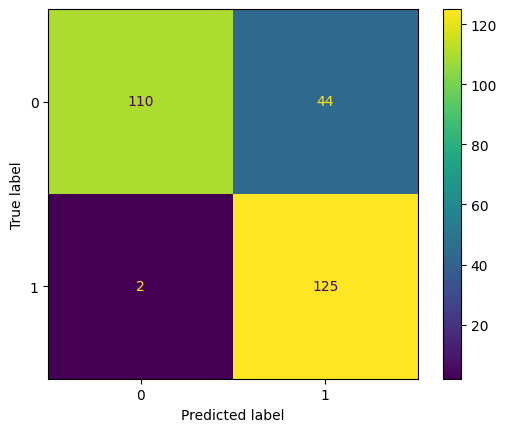

In [7]:
#@title Model Prediction
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)
conf_dis = ConfusionMatrixDisplay(conf_mat)
conf_dis.plot()
plt.show()

In [8]:
model.save("cv-dev-balanced.model")

INFO:tensorflow:Assets written to: cv-dev-balanced.model\assets


INFO:tensorflow:Assets written to: cv-dev-balanced.model\assets
